(c) 2019 Mitchell Blancas

In [1]:
from typing import List
import time
import matplotlib.pyplot as plt
from random import randint

In [2]:
def find_max_sub_array(A,low,high):
    if low==high:
        return low,high,A[low]
    else :
        mid=(low+high)//2
        left_low,left_high,left_sum=find_max_sub_array(A,low,mid)
        right_low,right_high,right_sum=find_max_sub_array(A,mid+1,high)
        cross_left,cross_right,cross_sum=find_max_cross_sum(A,low,mid,high)
        if left_sum>=right_sum and left_sum>=cross_sum:
            return left_low,left_high,left_sum
        elif right_sum>=left_sum and right_sum>=cross_sum :
            return right_low,right_high,right_sum
        else:
            return cross_left,cross_right,cross_sum


In [3]:
def find_max_cross_sum(A,low,mid,high):
    left_sum,max_left=-999999999,-1
    right_sum,max_right=-999999999,-1
    summ=0
    for i in range(mid,low-1,-1):
        summ+=A[i]
        if summ > left_sum:
            left_sum=summ
            max_left=i
    summ=0
    for i in range(mid+1,high+1):
        summ+=A[i]
        if summ > right_sum:
            right_sum=summ
            max_right=i
    return max_left,max_right,(left_sum+right_sum)


In [4]:
def max_sub_array(nums: List[int]) -> int:
    """
    Encuentra el subconjunto contiguo (puede ser un conjunto vacío)
     que tiene la suma más grande y devuelve su suma.

    >>> max_sub_array([-2,1,-3,4,-1,2,1,-5,4])
    6
    >>> max_sub_array([])
    0
    >>> max_sub_array([-1,-2,-3])
    0
    """
    best = 0
    current = 0
    for i in nums:
        current += i
        if current < 0:
            current = 0
        best = max(best, current)
    return best

Nro. de Entradas       Tiempo tomado
10 		 0.0
100 		 0.0
1000 		 0.0
10000 		 0.046874046325683594
50000 		 0.421875
100000 		 0.8124699592590332
200000 		 1.9218263626098633
300000 		 2.9374048709869385
400000 		 4.281108856201172
500000 		 4.999849081039429


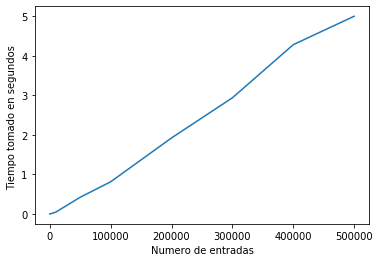

In [5]:
if __name__=='__main__':
    inputs=[10,100,1000,10000,50000,100000,200000,300000,400000,500000]
    tim=[]
    for i in inputs:
        li=[randint(1,i) for j in range(i)]
        strt=time.time()
        (find_max_sub_array(li,0,len(li)-1))
        end=time.time()
        tim.append(end-strt)
    print("Nro. de Entradas       Tiempo tomado")
    for i in range(len(inputs)):
        print(inputs[i],'\t\t',tim[i])
    plt.plot(inputs,tim)
    plt.xlabel("Numero de entradas");plt.ylabel("Tiempo tomado en segundos ")
    plt.show()